In [0]:
import numpy as np
import pandas as pd

In [0]:
url = 'https://raw.githubusercontent.com/davidwestuk/financial-data/master/dax_futures.csv'
df = pd.read_csv(url, parse_dates=True, index_col='Date')
df.index.name = None

In [9]:
df.head()

,Open,High,Low,Close
1999-12-30,8863.5,8935.5,8853.5,8930.5
2000-01-03,9091.5,9113.5,8670.5,8708.0
2000-01-04,8703.5,8703.5,8459.5,8533.5
2000-01-05,8370.5,8525.5,8366.5,8435.5
2000-01-06,8427.5,8480.5,8341.0,8409.0


In [0]:
def PFE(prices):
    """Polarised Fractal Efficiency (PFE)"""
    # prices[-1] is the latest price in our rolling window
    # prices[0] is the oldest price in our rolling window
    
    count = len(prices)
    top = ((prices[-1] - prices[0])**2 + (count - 1)**2)**0.5
    
    bottom = 0.0
    for i in range(count - 1):
        bottom += ((prices[i+1] - prices[i])**2 + 1)**0.5 
        
    if prices[-1] < prices[0]:
        top = -top
        
    return top / bottom

In [11]:
lookback = 20
pfe_indicator = df.Close.rolling(window=lookback).apply(PFE)
pfe_indicator.dropna(inplace=True)
pfe_indicator.head()

2000-01-27    0.064822
2000-01-28    0.150733
2000-01-31    0.114747
2000-02-01    0.245016
2000-02-02    0.307765
Name: Close, dtype: float64

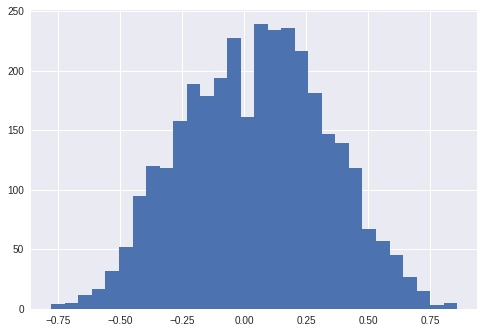

In [12]:
pfe_indicator.hist(bins=30)

In [15]:
factor = 100
df_new = df / factor
df_new.head()

,Open,High,Low,Close
1999-12-30,88.635,89.355,88.535,89.305
2000-01-03,90.915,91.135,86.705,87.080
2000-01-04,87.035,87.035,84.595,85.335
2000-01-05,83.705,85.255,83.665,84.355
2000-01-06,84.275,84.805,83.410,84.090
